# I- Presentation
Customer segmentation enables a company to customize its relationships with the customers, as we do in our daily lives.
When you perform customer segmentation, you find similar characteristics in each customer’s behaviour and needs. Then, those are generalized into groups to satisfy demands with various strategies. Moreover, those strategies can be an input of the :
- Targeted marketing activities to specific groups
- Launch of features aligning with the customer demand

Today, I will apply an unsupervised machine learning algorithm with Python.
I will apply K-Means clustering to the dataset with the following steps.
- Preprocessing
- Segmentation with K-means, DBSCAN and hierarchical Clustering
- Hyperparameter Tuning
- Visualization and Interpretation of the Results

# II- EDA

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

# Dislay options
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 2000)

#statistics
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
# ML models
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
#
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn import metrics
from pandas.plotting import parallel_coordinates
import plotly.graph_objects as go
from sklearn.manifold import TSNE
import umap.umap_ as umap
from kneed import KneeLocator
from time import time


In [2]:
df = pd.read_csv('customer segmentation olist.csv')
df

,total_orders,total_item,total_products_payment,total_freight_payment,freight_ratio,mean_review_score,order_mean_sequential_number,order_mean_installement_number,order_mean_delivery_delay(day),recency(day),mean_delay_between_orders,"ratio_price_Books, cds & media","ratio_price_Fashion, clothing and accessories",ratio_price_Flowers_gifts,"ratio_price_Groceries, food & drink",ratio_price_Health & Beauty,ratio_price_Home & furniture,ratio_price_Sport & leisure,ratio_price_Technology,ratio_price_Toys and baby,ratio_price_other,ratio_price_April,ratio_price_August,ratio_price_December,ratio_price_February,ratio_price_January,ratio_price_July,ratio_price_June,ratio_price_March,ratio_price_May,ratio_price_November,ratio_price_October,ratio_price_September,ratio_price_AC,ratio_price_AL,ratio_price_AM,ratio_price_AP,ratio_price_BA,ratio_price_CE,ratio_price_DF,ratio_price_ES,ratio_price_GO,ratio_price_MA,ratio_price_MG,ratio_price_MS,ratio_price_MT,ratio_price_PA,ratio_price_PB,ratio_price_PE,ratio_price_PI,ratio_price_PR,ratio_price_RJ,ratio_price_RN,ratio_price_RO,ratio_price_RR,ratio_price_RS,ratio_price_SC,ratio_price_SE,ratio_price_SP,ratio_price_TO
0,1,1,129.90,12.00,0.08,5.0,1.0,8.0,6.0,111,695.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,18.90,8.29,0.30,4.0,1.0,1.0,3.0,114,695.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,69.00,17.22,0.20,3.0,1.0,8.0,26.0,537,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,25.99,17.63,0.40,4.0,1.0,4.0,20.0,321,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,180.00,16.89,0.09,5.0,1.0,6.0,13.0,288,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91468,1,2,1570.00,497.42,0.24,5.0,1.0,10.0,28.0,447,695.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91469,1,1,64.89,19.69,0.23,4.0,1.0,1.0,30.0,262,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91470,1,1,89.90,22.56,0.20,5.0,1.0,1.0,15.0,568,695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91471,1,1,115.00,18.69,0.14,5.0,1.0,5.0,12.0,119,695.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
len(df[df['total_orders']>1])/len(df)

0.029593431941665846

In [4]:
df.rename(columns={'total_orders':'Frequency', 'total_products_payment':'Monetary', 'recency(day)':'Recency'}, inplace=True)

In [5]:
RFM_df = df[['Frequency', 'Monetary', 'Recency']]

In [6]:
RFM_df.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
Frequency,91473.000000,1.032873,0.206224,1.000000,1.000000,1.000000,1.000000,14.000000
Monetary,91473.000000,141.393816,214.253408,0.850000,47.650000,89.180000,154.200000,13440.000000
Recency,91473.000000,236.694981,152.590800,0.000000,113.000000,218.000000,345.000000,695.000000


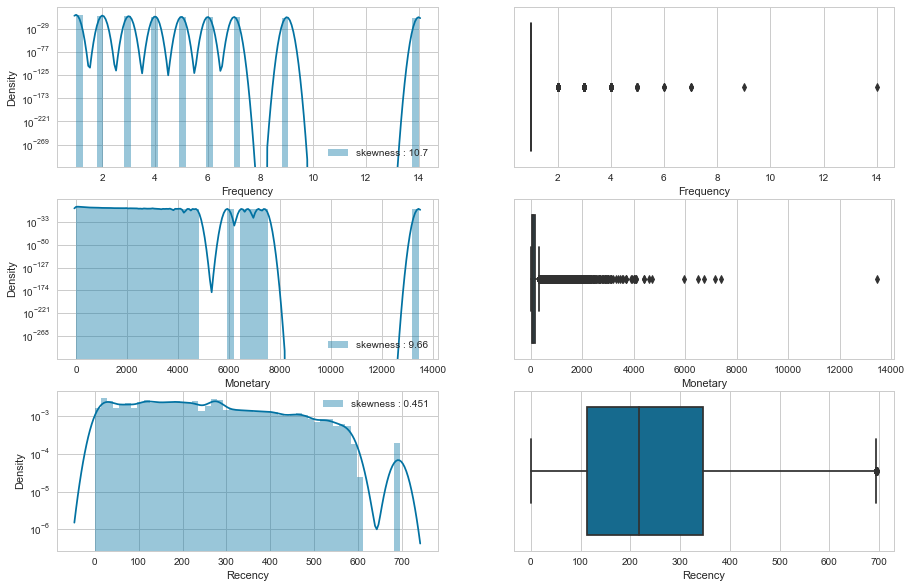

In [7]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure(1, figsize=(15,10))
for i,label in enumerate(RFM_df.columns) :
    plt.subplot(3,2,2*i+1)
    sns.distplot(RFM_df[label] , label ="skewness : {:.3}".format(RFM_df[label].skew()))
    plt.yscale("log")

    plt.legend()
    plt.subplot(3,2,2*i+2)
    sns.boxplot(RFM_df[label], orient="v")
plt.show()

Text(0.5, 1.0, 'order per customer')

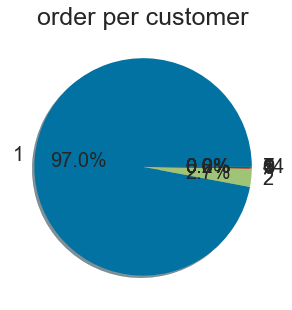

In [8]:
fig,ax = plt.subplots (figsize = (5,5))
plt.style.use('seaborn-whitegrid')
ax.pie(RFM_df["Frequency"].value_counts(), labels = RFM_df["Frequency"].unique() ,
       autopct ='%1.1f%%' , shadow=True , textprops={'fontsize': 20})  
plt.title ("order per customer" , size= 25)

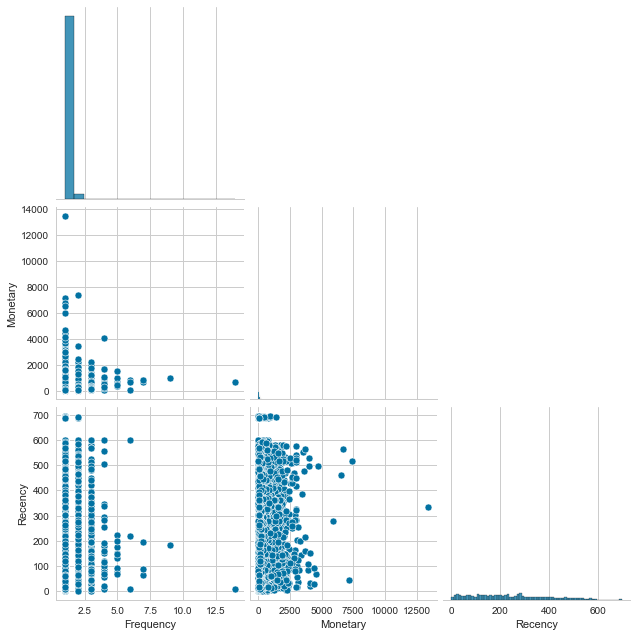

In [9]:
plt.style.use('seaborn-whitegrid')
sns.pairplot(RFM_df, corner=True, height=3)

In [10]:
palette = ['lightgreen','darkviolet','red','blue','gray']
colormap=np.array(palette)

def plot_3D (data) : 
    plt.style.use('seaborn-whitegrid')

    fig = plt.figure(figsize=((10,10)))
    ax = fig.add_subplot(111, projection = '3d')

    x = data['Recency']    
    y = data['Frequency']
    z = data['Monetary']
    ax.set_xlabel("Recency")
    ax.set_ylabel("Frequency")
    ax.set_zlabel("Monetary")
    plt.ylim([1,4])
    ax.set_zlim([0,8000])
    
    ax.scatter(x, y, z, c='blue')
    ax.view_init(elev=10, azim=10)
    


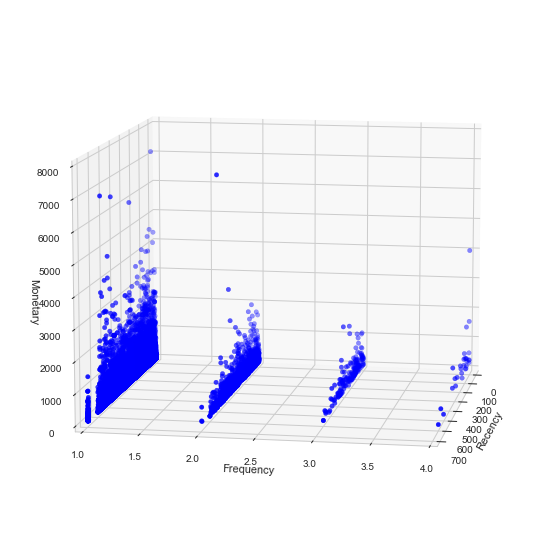

In [11]:
plot_3D(RFM_df)

# III- Preprocessing

In [12]:
features_to_scale = ['Frequency', 'Monetary', 'Recency']
preprocessor = make_column_transformer((StandardScaler(),features_to_scale),
                                 remainder='passthrough')

# VI- Clustering Models

In [13]:
def plot_3D_clusters (data, col):
    
    sns.set(style = "whitegrid")

    fig = plt.figure(figsize=((10,10)))
    ax = fig.add_subplot(111, projection = '3d')

    x = data['Recency']    
    y = data['Frequency']
    z = data['Monetary']
    ax.set_xlabel("Recency")
    ax.set_ylabel("Frequency")
    ax.set_zlabel("Monetary")
    plt.ylim([1,4])
    ax.set_zlim([0,8000])
    
    ax.scatter(x, y, z, c=colormap[data[col]])
    ax.view_init(elev=10, azim=10)
    
#############################################

def cluster_individual(data, column, invert=False):
    data = data
    columnName = str(column)
    className = "class_" + columnName
    X = data[column]
    X = pd.DataFrame(X)
    

    print('Results for clustering the feature:', columnName)
    
    # n_clusters = 3

    #Define the model using Elbow method to show best K value 
    kmeans_kwargs = {
        "n_clusters": 4,
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 1,
    }
    #--------> Sort Clusters by yasirroni
    #--------> https://github.com/yasirroni/sorted_cluster
    #--------> Copyright (c) 2020 Muhammad Yasirroni

    def sorted_cluster(x, model=None):
        if model == None:
            model = KMeans()
        model = sorted_cluster_centers_(model, x)
        model = sorted_labels_(model, x)
        return model
    def sorted_cluster_centers_(model, x):
        model.fit(x)
        new_centroids = []
        magnitude = []
        for center in model.cluster_centers_:
            magnitude.append(np.sqrt(center.dot(center)))
        idx_argsort = np.argsort(magnitude)
        model.cluster_centers_ = model.cluster_centers_[idx_argsort]
        return model
    def sorted_labels_(sorted_model, x):
        sorted_model.labels_ = sorted_model.predict(x)
        return sorted_model

#--------> Sort Clusters by yasirroni

    # Final model 
    km = KMeans(**kmeans_kwargs).fit(X)

    # assign a cluster to each
    # X[className] = km.fit_predict(X)
    cluster = sorted_cluster(X, km)
    X[className] = cluster.predict(X)
    #------Plot results of the clustering using the above K
    plt.figure(figsize=(12,3))
    plt.title('Results of clustering')
    plt.style.use('seaborn-whitegrid')

    sns.scatterplot(x=X[columnName], y=X.index, hue=X[className], s=30, palette=['red','blue','green','black'])
    
    #Append the clustering to the original DataSet
    data[className] = X[className] + 1

    if invert:
        data[className] = data[className].map({4:1,
                                            3:2,
                                            2:3,
                                            1:4})


In [14]:
def elbow_score(data):
    """
    """
    plt.style.use('seaborn-whitegrid')
    kmeans=KMeans(random_state=1)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    distortion_visualizer = KElbowVisualizer(kmeans,k=(2,9))
    distortion_visualizer.fit(data)
    distortion_visualizer.show()
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,2)
    calinski_visualizer = KElbowVisualizer(kmeans,k=(2,9), metric='calinski_harabasz')
    calinski_visualizer.fit(data)
    calinski_visualizer.show()

    ####################################
def silhouette_score(data):
    kmeans=KMeans(random_state=1)
    plt.figure(figsize=(10,10))
    plt.subplot(2,2,3)
    silhouette_visualizer = KElbowVisualizer(kmeans,K=(2,9), metric='silhouette')
    silhouette_visualizer.fit(data)
    silhouette_visualizer.show()

###############################

def silhouette_visualizer(data, best_k):
    """
    """
    plt.figure(figsize=(5,6))
    plt.style.use('seaborn-whitegrid')

    silhouette_visualizer = SilhouetteVisualizer(KMeans(best_k), colors=palette)
    silhouette_visualizer.fit(data)
    silhouette_visualizer.show()
    
################################

def intercluster_distance(data, best_k):
    """Intercluster distance Map with best k
    """
    plt.style.use('seaborn-whitegrid')

    distance_visualizer = InterclusterDistance(KMeans(best_k),colors=palette)
    distance_visualizer.fit(data)
    distance_visualizer.show()    

## 1- Individual clustering

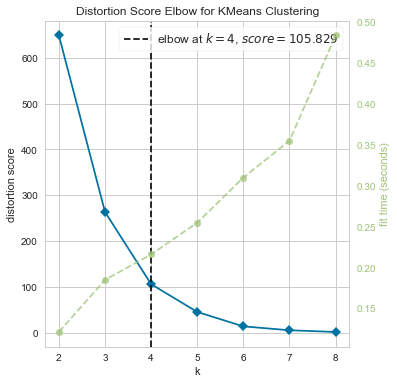

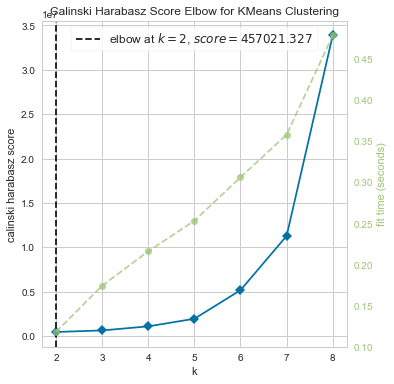

In [15]:
elbow_score(RFM_df[['Frequency']])

Results for clustering the feature: Recency


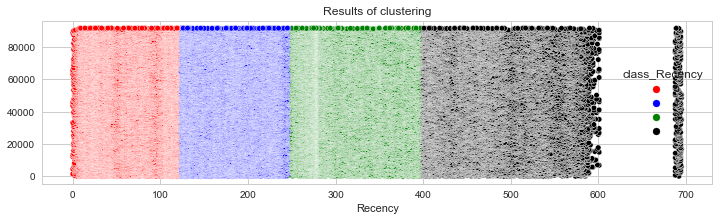

In [16]:
recency_df = RFM_df.copy()
cluster_individual(recency_df, 'Recency', invert=True)

Results for clustering the feature: Frequency


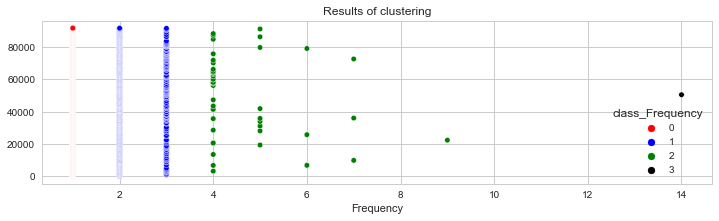

In [17]:
frequency_df = RFM_df.copy()
cluster_individual(frequency_df, 'Frequency', invert=True)

Results for clustering the feature: Monetary


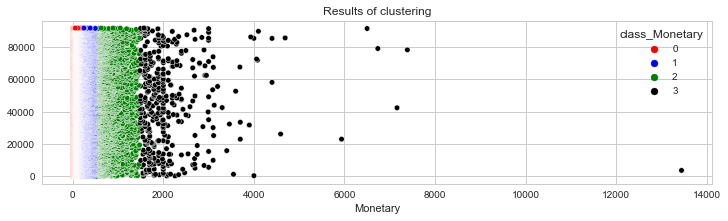

In [18]:
monetary_df = RFM_df.copy()
cluster_individual(monetary_df, 'Monetary', invert=True)

## 2- RFM clustering with KMeans

### 2-1- Hyperparameter tuning

In [19]:
X_kmeans = RFM_df
X_kmeans_scale=preprocessor.fit_transform(X_kmeans)
X_kmeans_scale = pd.DataFrame(data=X_kmeans_scale, columns=X_kmeans.columns)

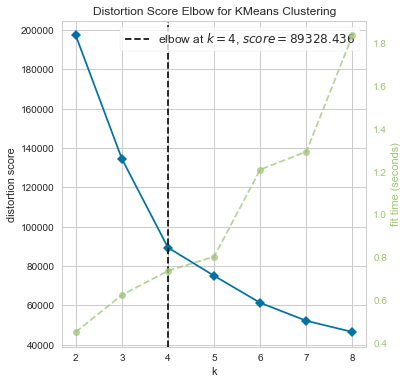

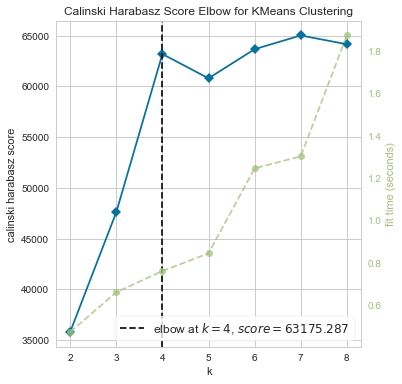

Wall time: 14.9 s


In [20]:
%%time
elbow_score(X_kmeans_scale)

In [21]:
data = X_kmeans_scale.sample(frac=0.1)
silhouette_avg = []
for k in range(2,9):
    kmeans=KMeans(random_state=1, n_clusters=k)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg.append(metrics.silhouette_score(data, cluster_labels))
    
silhouette_avg

[0.736595924016953,
 0.46321987311995416,
 0.49129581866411676,
 0.505847693573835,
 0.44807359090596216,
 0.452020475527062,
 0.454559185417124]

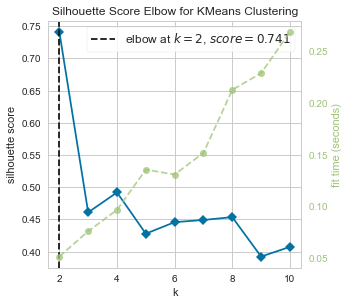

In [22]:
silhouette_score(X_kmeans_scale.sample(frac=.1))

In [23]:
kmin=2
kmax=6
X_kmeans_clusters = X_kmeans.copy()
for k in range (kmin, kmax+1):
    kmeans=KMeans(random_state=1, n_clusters=k)
    kmeans.fit(X_kmeans_scale)
    X_kmeans_clusters[str(k)+' '+'clusters'] = kmeans.labels_

In [24]:
X_kmeans_clusters

,Frequency,Monetary,Recency,2 clusters,3 clusters,4 clusters,5 clusters,6 clusters
0,1,129.90,111,0,0,2,4,5
1,1,18.90,114,0,0,2,4,5
2,1,69.00,537,0,1,0,0,4
3,1,25.99,321,0,1,0,1,0
4,1,180.00,288,0,1,0,1,0
...,...,...,...,...,...,...,...,...
91468,1,1570.00,447,0,1,3,3,3
91469,1,64.89,262,0,1,0,1,0
91470,1,89.90,568,0,1,0,0,4
91471,1,115.00,119,0,0,2,4,5


In [25]:
clusers_columns = ['2 clusters', '3 clusters','4 clusters', '5 clusters', '6 clusters']
for col in clusers_columns : 
    print('the number of customers per cluster in',col,'is:\n',X_kmeans_clusters[col].value_counts())
    print(50*'_')

the number of customers per cluster in 2 clusters is:
 0    88761
1     2712
Name: 2 clusters, dtype: int64
__________________________________________________
the number of customers per cluster in 3 clusters is:
 0    50942
1    37819
2     2712
Name: 3 clusters, dtype: int64
__________________________________________________
the number of customers per cluster in 4 clusters is:
 2    49634
0    36736
1     2684
3     2419
Name: 4 clusters, dtype: int64
__________________________________________________
the number of customers per cluster in 5 clusters is:
 4    33559
1    32711
0    20403
2     2683
3     2117
Name: 5 clusters, dtype: int64
__________________________________________________
the number of customers per cluster in 6 clusters is:
 5    32680
0    31644
4    19903
1     3994
2     2684
3      568
Name: 6 clusters, dtype: int64
__________________________________________________


In [26]:
best_k=3

### 2-2- Clustering

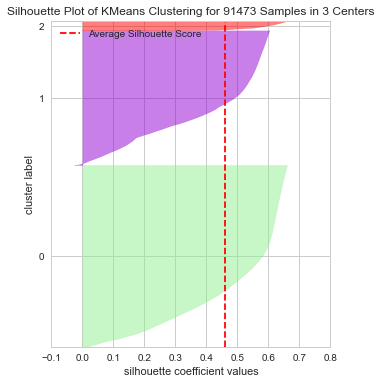

In [27]:
silhouette_visualizer(X_kmeans_scale, best_k)

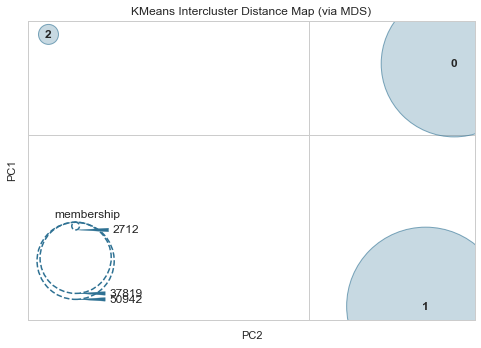

In [28]:
intercluster_distance(X_kmeans_scale, best_k)

Thanks to the elbow method based on the distortion score (average sum of the squares of the distances to the centers), a segmentation in K = 5 clusters would be the best option.

In [29]:
model = KMeans(n_clusters=best_k)
clusters = model.fit_predict(X_kmeans_scale)
print("clusters creayed are : "+ str(list(set(clusters))))

clusters creayed are : [0, 1, 2]


In [30]:
X_kmeans_clusters = X_kmeans_clusters[['Recency','Frequency','Monetary','3 clusters']]
X_kmeans_clusters.rename(columns={'3 clusters':'cluster'}, inplace=True)
X_kmeans_clusters

,Recency,Frequency,Monetary,cluster
0,111,1,129.90,0
1,114,1,18.90,0
2,537,1,69.00,1
3,321,1,25.99,1
4,288,1,180.00,1
...,...,...,...,...
91468,447,1,1570.00,1
91469,262,1,64.89,1
91470,568,1,89.90,1
91471,119,1,115.00,0


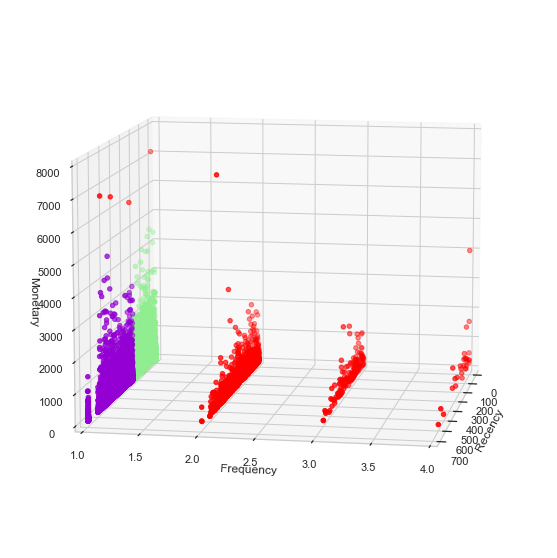

In [31]:
plot_3D_clusters(X_kmeans_clusters, 'cluster' )

### 2-3- Clusters analyzing

In [32]:
def display_parallel_coordinates_centroids(df, num_clusters):
    '''Display a parallel coordinates plot for the centroids in df'''

    # Create the plot
    fig = plt.figure(figsize=(12, 5))
    plt.style.use('seaborn-whitegrid')

    title = fig.suptitle("Parallel Coordinates plot for the Centroids", fontsize=18)
    fig.subplots_adjust(top=0.9, wspace=0)

    # Draw the chart
    parallel_coordinates(df, 'cluster', color=palette)

    # Stagger the axes
    ax=plt.gca()
    for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)    
#################################################

def customers_per_cluster(data):
    """"""
    plt.rcParams["figure.figsize"]=(6,6)
    plt.rcParams["figure.autolayout"] = True
    plt.style.use('seaborn-whitegrid')

    ax = sns.countplot(data=data, x='cluster', palette=palette)
   
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.title('customers per cluster', size=25)
    plt.xlabel('cluster', size=15)
    plt.ylabel('count', size=15)

    plt.show()

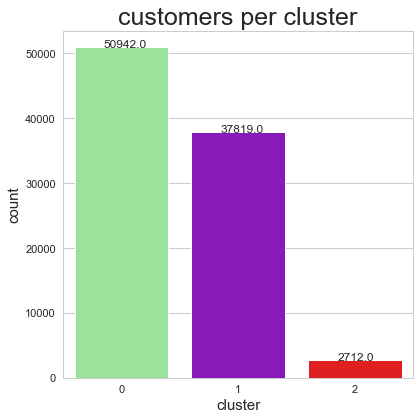

In [33]:
customers_per_cluster(X_kmeans_clusters)

In [34]:
centroids = X_kmeans_clusters.groupby('cluster').mean()
centroids

,Recency,Frequency,Monetary
cluster,,,
0,126.679616,1.000000,136.396591
1,386.125836,1.000000,138.599921
2,219.393068,2.108776,274.222334


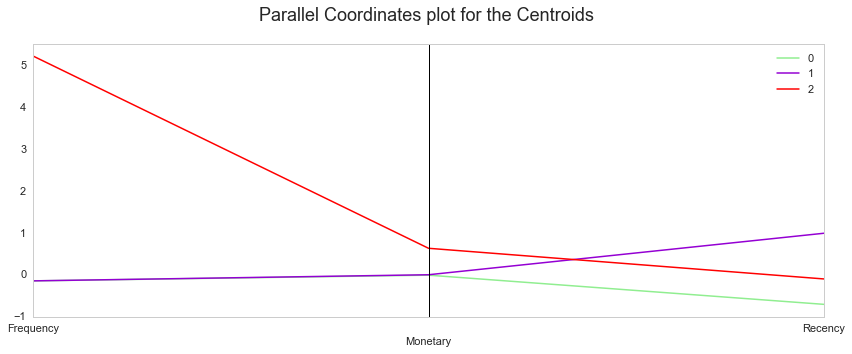

In [35]:
kmeans_centroids = model.cluster_centers_
kmeans_centroids = pd.DataFrame(data=kmeans_centroids, columns=X_kmeans.columns)
kmeans_centroids=kmeans_centroids.reset_index()
kmeans_centroids.rename(columns={'index':'cluster'}, inplace=True)
kmeans_centroids
display_parallel_coordinates_centroids(kmeans_centroids, best_k)

In [36]:
def boxplot(data, col) : 
    fig=plt.figure(figsize=(7,6))
    sns.boxplot(data=data, x='cluster', y=col, palette=palette)   
    plt.xlabel('Cluster', size=20)
    plt.xticks(size=15)
    plt.ylabel(col, size=20)
    plt.yticks(size=15)


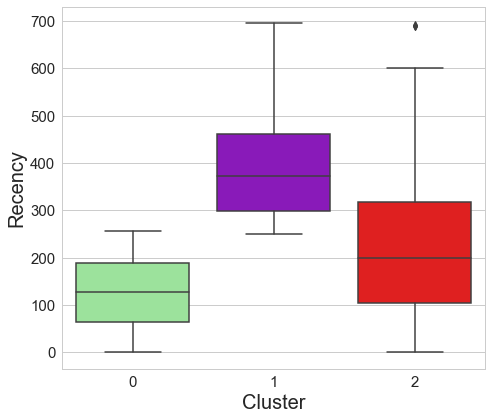

In [37]:
boxplot(X_kmeans_clusters, 'Recency')

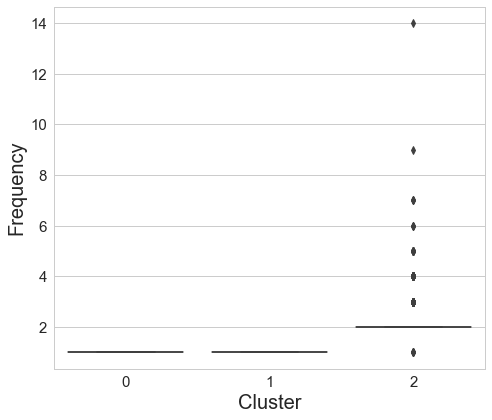

In [38]:
boxplot(X_kmeans_clusters, 'Frequency')

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

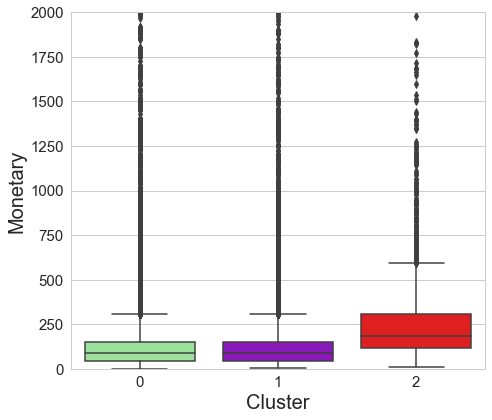

In [39]:
fig=plt.figure(figsize=(7,6))
sns.boxplot(data=X_kmeans_clusters, x='cluster', y='Monetary', palette=palette)    
plt.ylim([0,2000])
plt.xlabel('Cluster', size=20)
plt.xticks(size=15)
plt.ylabel('Monetary', size=20)
plt.yticks(size=15)


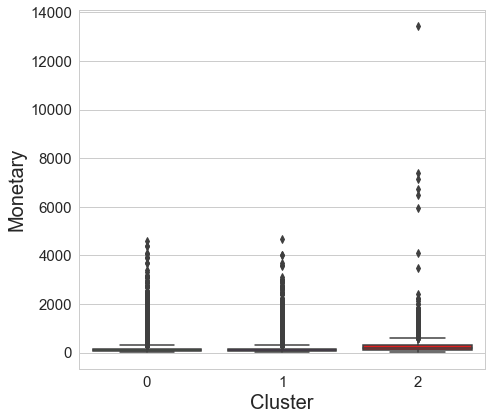

In [40]:
boxplot(X_kmeans_clusters, 'Monetary')

### 2-4- k-means with Dimensionality Reduction Techniques

In [41]:
def plot_2D_reduction (data, col, method):
    """
    """
    plt.style.use('seaborn-whitegrid')
    fig , ax = plt.subplots (figsize = (8,8))
    
    ax.scatter (x=data["DIM1"] , y=data["DIM2"], c=colormap[data[col]])
    plt.title(str(method)+' projection', size=25)
    plt.xlabel('DIM 1', size=15)
    plt.ylabel('DIM 2', size=15)

#### a- PCA

In [42]:
def display_scree_plot(pca,n_components):
    
    scree = pca.explained_variance_ratio_*100
    plt.style.use('seaborn-whitegrid')

    plt.figure (figsize=(7,7))
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("principal component", size = 30)
    plt.ylabel("pourcentage of variance" , size = 30)
    plt.title("scree of eigenvalues" , size = 30)
    p = (100 / n_components) 
    plt.axhline(y = (100 / n_components), linewidth = 1, color = "dimgray", linestyle = "--")
    plt.text(5, 18, "p"+"%")
    plt.show(block=False)   

In [43]:
# Calculate PCA
pca = PCA (n_components = 3, svd_solver="full" ) # decomposition into singular values
X_pca = pca.fit_transform(X_kmeans_scale)
centroids_pca = pca.transform(kmeans_centroids.drop(columns='cluster', axis=1))
centroids_pca

array([[-0.02372378, -0.71128376,  0.19815265],
       [-0.26445398,  0.95579305, -0.03421292],
       [ 4.1333633 ,  0.03272383, -3.24506864]])

In [44]:
pca_columns = ['DIM' + str(c) for c in range(1, X_pca.shape[1]+1, 1)] 
X_pca  = pd.DataFrame (data = X_pca, columns= pca_columns)
X_pca['cluster']=clusters
X_pca

,DIM1,DIM2,DIM3,cluster
0,-0.029739,-0.818071,0.191618,0
1,-0.391218,-0.903812,-0.170011,0
2,-0.633424,1.858171,-0.398476,1
3,-0.566047,0.431313,-0.338154,1
4,-0.036955,0.365213,0.190216,1
...,...,...,...,...
91468,4.301908,2.700382,4.537286,1
91469,-0.384011,0.089477,-0.157933,1
91470,-0.595514,2.076882,-0.359520,1
91471,-0.085519,-0.780824,0.136063,0


In [45]:
explained_variance = pd.Series(dict(zip(X_pca.columns, 100.0*pca.explained_variance_ratio_)))
display(explained_variance)

DIM1    36.949213
DIM2    33.327908
DIM3    29.722880
dtype: float64

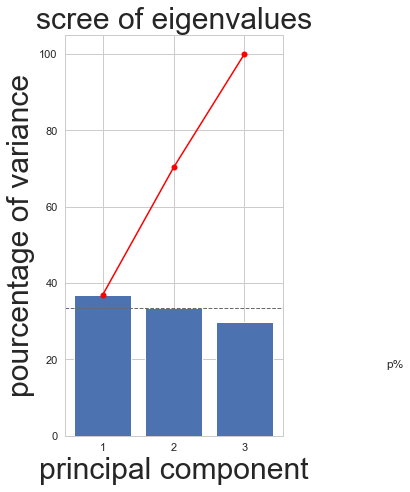

In [46]:
display_scree_plot(pca, 3)

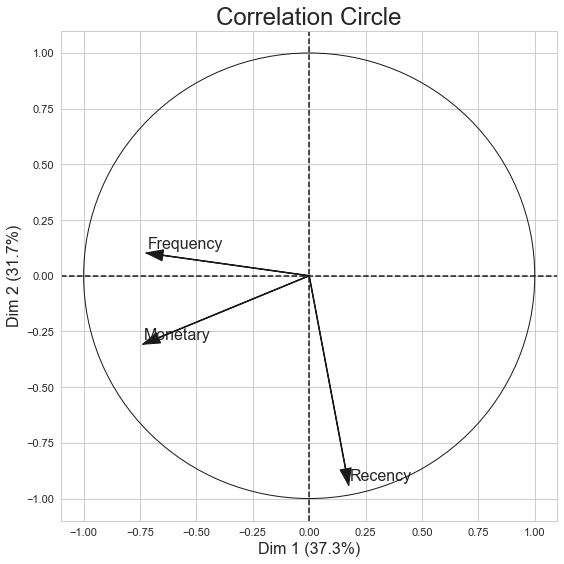

In [47]:
X_corr=X_kmeans_scale.sample(frac=0.1)
figure , correlation_matrix = plot_pca_correlation_graph (X_corr.values , X_corr.columns , dimensions=(1,2) , figure_axis_size=8)

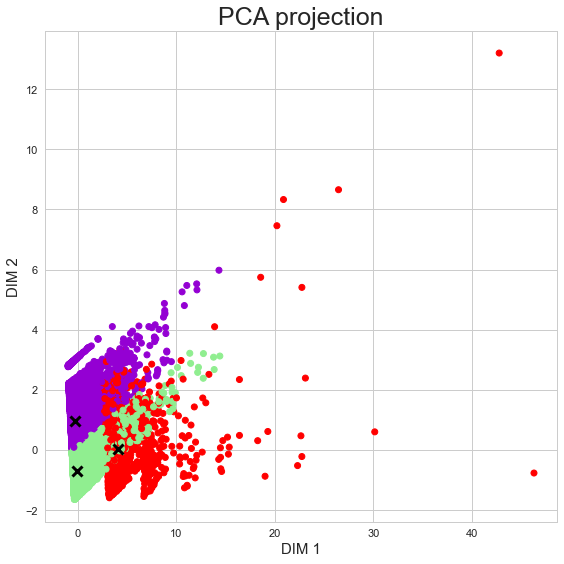

In [48]:
plot_2D_reduction (X_pca, 'cluster', 'PCA')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=100, linewidths=3,  color='black', zorder=10)

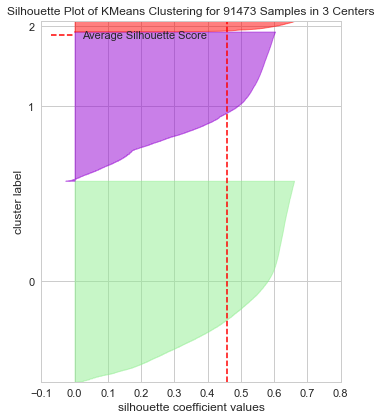

In [49]:
silhouette_visualizer(X_pca.drop(columns='cluster', axis=1), best_k )

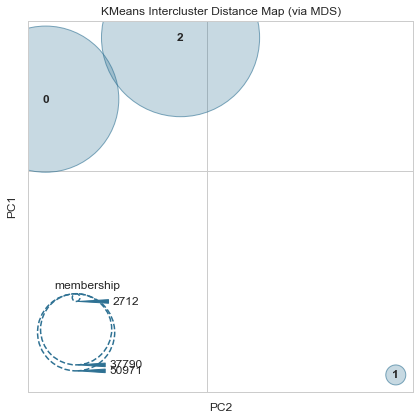

In [50]:
intercluster_distance(X_pca.drop(columns='cluster', axis=1), best_k)

#### b- t-SNE

In [51]:
df_tsne = RFM_df.sample(frac=.02)
df_tsne_scale=preprocessor.fit_transform(df_tsne)
df_tsne_scale = pd.DataFrame(data=df_tsne_scale, columns=df_tsne.columns)
df_tsne_scale

,Frequency,Monetary,Recency
0,-0.189920,2.181760,-0.988546
1,-0.189920,-0.259182,-0.155923
2,-0.189920,0.336979,0.165325
3,-0.189920,-0.381019,-1.362243
4,-0.189920,8.103459,0.394788
5,-0.189920,0.105909,-1.395024
6,-0.189920,-0.170955,-1.165561
7,-0.189920,-0.168434,1.594553
8,-0.189920,-0.125581,1.751899
9,-0.189920,-0.471346,-1.486809


In [52]:
%%time
clusters = model.fit_predict(df_tsne_scale)
print("clusters creayed are : "+ str(list(set(clusters))))

clusters creayed are : [0, 1, 2]
Wall time: 45.5 ms


In [53]:
%%time
tsne = TSNE(n_components=2, random_state=0, perplexity=40, init='pca', n_iter=3000)
X_tsne = tsne.fit_transform(df_tsne_scale)

Wall time: 17.2 s


In [54]:
tsne.kl_divergence_

0.43646326661109924

In [55]:
tsne.embedding_

array([[ 14.841026 ,   4.859288 ],
       [-19.938696 ,  -5.5873404],
       [ -0.796014 , -11.406587 ],
       ...,
       [ -4.2460246,  48.386932 ],
       [ 22.244015 ,   3.8696606],
       [ 30.341417 , -21.958292 ]], dtype=float32)

In [56]:
tsne_columns = ['DIM' + str(c) for c in range(1, X_tsne.shape[1]+1, 1)] 
X_tsne  = pd.DataFrame (data = X_tsne, columns= tsne_columns)
X_tsne['cluster']=clusters
X_tsne

,DIM1,DIM2,cluster
0,14.841026,4.859288,0
1,-19.938696,-5.587340,0
2,-0.796014,-11.406587,2
3,0.301221,47.016479,0
4,24.076748,4.010338,2
5,6.427689,31.410728,0
6,-4.457900,34.778233,0
7,29.805300,-30.340542,2
8,31.803375,-27.864103,2
9,2.695321,52.363541,0


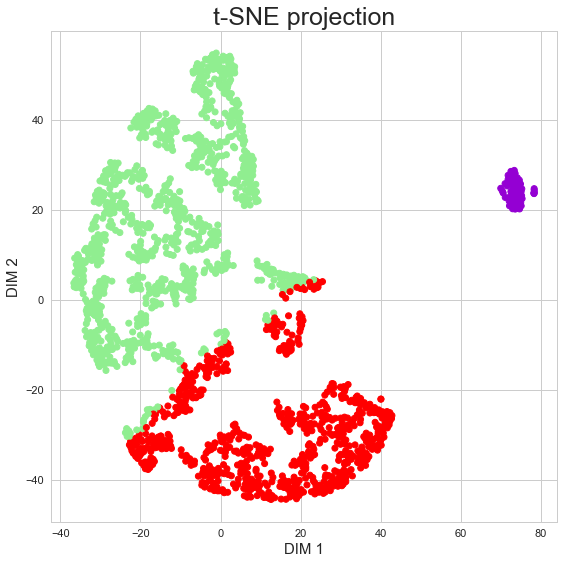

In [57]:
plot_2D_reduction (X_tsne, 'cluster','t-SNE')

### 2-5- k-means stability

In [58]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = model.fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator.inertia_]
    
    # Test differents metrics on pred labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score]
    results += [m(labels, estimator.labels_) for m in clustering_metrics]
     # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [59]:
print("               KMeans stability")
print(53 * '_')
print('Iteration\tFitTime\tInertia\tHomo\tARI\tAMI')
print(53 * '_')

for i in range(10):
    model = KMeans(n_clusters=best_k, n_init=3, init="k-means++")# 
    sample = X_kmeans_scale.sample(frac=0.2)
    model.fit(sample)
    labels=model.labels_
    bench_k_means(model, "Iter "+str(i), sample, labels)

print(53 * '_')

               KMeans stability
_____________________________________________________
Iteration	FitTime	Inertia	Homo	ARI	AMI
_____________________________________________________
Iter 0   	0.049s	26416	1.000	1.000	1.000
Iter 1   	0.042s	26042	0.995	0.998	0.995
Iter 2   	0.047s	23960	1.000	1.000	1.000
Iter 3   	0.061s	25016	0.996	0.999	0.996
Iter 4   	0.034s	25039	0.993	0.997	0.993
Iter 5   	0.032s	28881	0.989	0.995	0.989
Iter 6   	0.076s	26049	1.000	1.000	1.000
Iter 7   	0.059s	31477	0.991	0.996	0.991
Iter 8   	0.061s	25726	1.000	1.000	1.000
Iter 9   	0.045s	27833	0.999	1.000	0.999
_____________________________________________________


In [60]:
print("               KMeans stability")
print(53 * '_')
print('Iteration\tFitTime\tInertia\tHomo\tARI\tAMI')
print(53 * '_')

for i in range(10):
    model = KMeans(n_clusters=best_k, n_init=3, init="random")# à corriger
    sample = X_kmeans_scale.sample(frac=0.2)
    model.fit(sample)
    labels=model.labels_
    bench_k_means(model, "Iter "+str(i), sample, labels)

print(53 * '_')

               KMeans stability
_____________________________________________________
Iteration	FitTime	Inertia	Homo	ARI	AMI
_____________________________________________________
Iter 0   	0.062s	25542	0.998	0.999	0.998
Iter 1   	0.055s	26080	0.999	1.000	0.999
Iter 2   	0.063s	24099	0.998	0.999	0.998
Iter 3   	0.053s	25997	1.000	1.000	1.000
Iter 4   	0.053s	23979	0.994	0.998	0.994
Iter 5   	0.052s	27928	1.000	1.000	1.000
Iter 6   	0.101s	25442	1.000	1.000	1.000
Iter 7   	0.047s	28945	0.984	0.992	0.984
Iter 8   	0.052s	23475	0.999	1.000	0.999
Iter 9   	0.046s	25510	0.995	0.998	0.995
_____________________________________________________


## 3- Grouped clustering with DBSCAN

### 3-1- Hyperparameter tuning

In [70]:
X_DBSCAN = RFM_df.sample(frac=0.1) 
X_DBSCAN_scale=preprocessor.fit_transform(X_DBSCAN)
X_DBSCAN_scale = pd.DataFrame(data=X_DBSCAN_scale, columns=RFM_df.columns)

In [62]:
min_samples = X_DBSCAN.shape[1]*2
k = min_samples if min_samples > 2 else 2
neighbors = NearestNeighbors(n_neighbors=k).fit(X_DBSCAN_scale)
distances, indices = neighbors.kneighbors(X_DBSCAN_scale)

In [63]:
print("min samples: " + str(min_samples))
print("shape of distances matrix: " + str(distances.shape) + '\n')
for enum, row in enumerate(distances[:5]):
    print("observation: " + str(enum) + ":" + str([round(x, 2) for x in row]))

min samples: 6
shape of distances matrix: (9147, 6)

observation: 0:[0.0, 0.01, 0.01, 0.01, 0.02, 0.02]
observation: 1:[0.0, 0.0, 0.01, 0.01, 0.01, 0.01]
observation: 2:[0.0, 0.06, 0.14, 0.14, 0.14, 0.14]
observation: 3:[0.0, 0.01, 0.01, 0.02, 0.02, 0.02]
observation: 4:[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [64]:
X_DBSCAN_scale['knn farthest distance'] = distances[:,-1]
X_DBSCAN_scale.head()

,Frequency,Monetary,Recency,knn farthest distance
0,-0.164935,-0.384489,0.688902,0.022098
1,-0.164935,-0.457898,-0.513663,0.014281
2,4.814132,0.016065,0.388261,0.143737
3,-0.164935,-0.420956,-0.023487,0.019607
4,-0.164935,-0.247277,0.264083,0.000000


(0.0, 1.25)

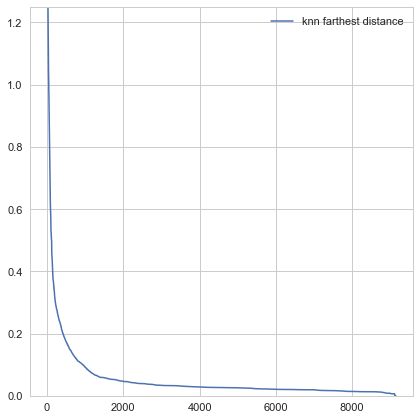

In [65]:
plt.style.use('seaborn-whitegrid')
X_DBSCAN_scale.sort_values('knn farthest distance', ascending=False).reset_index()[['knn farthest distance']].plot()
plt.ylim([0,1.25])

<Figure size 360x360 with 0 Axes>

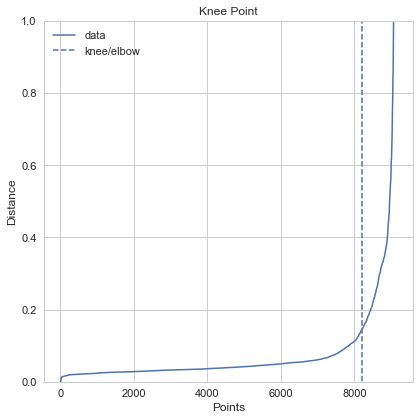

the best_eps is : 0.146


In [66]:
#best eps determination
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X_DBSCAN_scale)

distances, indices = neighbors.kneighbors(X_DBSCAN_scale)
distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
plt.style.use('seaborn-whitegrid')

knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.ylim([0,1])
plt.show()

best_eps = distances[knee.knee]
best_eps=round(best_eps, 3)
print('the best_eps is :',best_eps)

### 3-2- Clustering

In [71]:
%%time
model = DBSCAN(eps=best_eps, min_samples=40)
clusters = model.fit_predict(X_DBSCAN_scale)
print("clusters creayed are : "+ str(list(set(clusters))))

clusters creayed are : [0, -1]
Wall time: 273 ms


In [72]:
X_DBSCAN['cluster']=clusters
X_DBSCAN['cluster'] = X_DBSCAN['cluster'].replace({-1:1})
X_DBSCAN

,Frequency,Monetary,Recency,cluster
46142,1,68.00,218,0
12958,2,383.90,84,1
42825,1,98.44,156,0
71033,1,94.60,385,0
56622,1,44.00,202,0
...,...,...,...,...
44542,1,49.90,212,0
26025,1,200.00,33,0
33641,1,39.90,277,0
40514,1,10.49,600,0


In [73]:
X_DBSCAN['cluster'].value_counts()

0    7833
1    1314
Name: cluster, dtype: int64

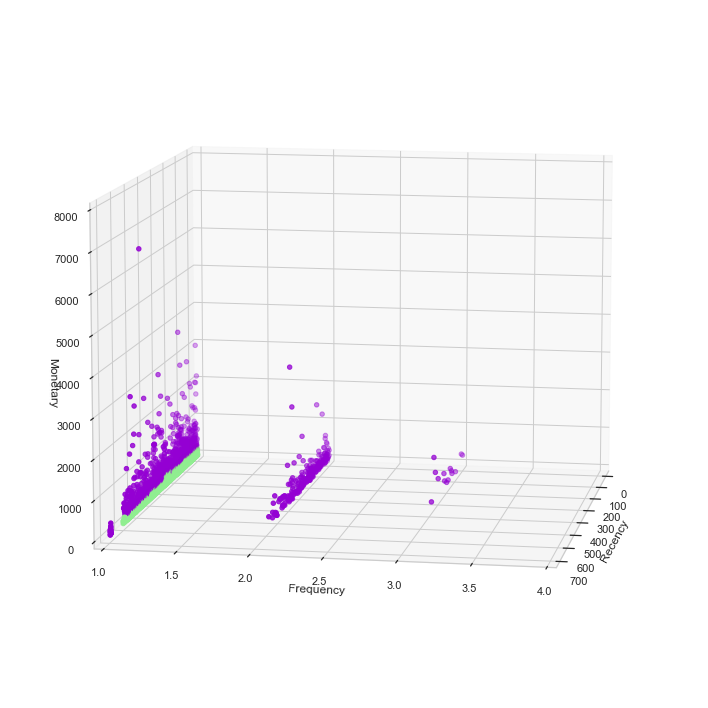

In [74]:
plot_3D_clusters(X_DBSCAN, 'cluster' )

### 2-3- Clusters analyzing

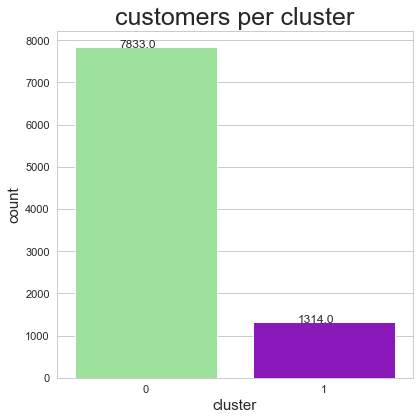

In [75]:
customers_per_cluster(X_DBSCAN)

In [76]:
X_DBSCAN.groupby('cluster').mean()

,Frequency,Monetary,Recency
cluster,,,
0,1.000000,89.705944,230.519214
1,1.229833,455.302595,270.662861


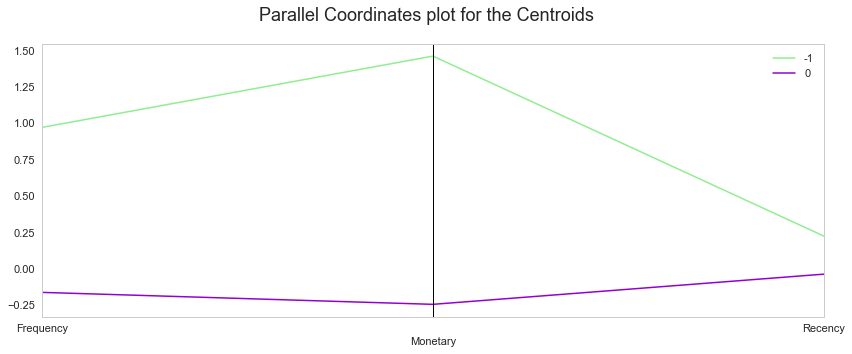

In [77]:
X_DBSCAN_scale['cluster']=clusters
centroids = X_DBSCAN_scale.groupby('cluster').mean()
centroids = centroids.reset_index()
display_parallel_coordinates_centroids(centroids, 2)

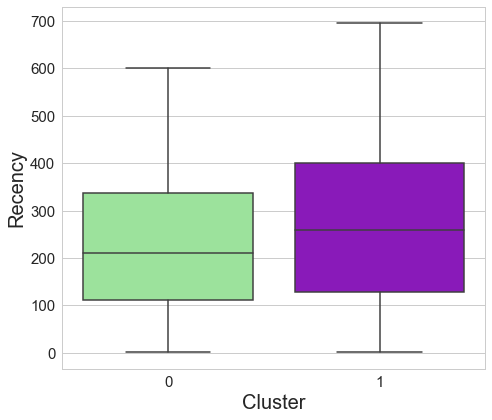

In [78]:
boxplot(X_DBSCAN, 'Recency')

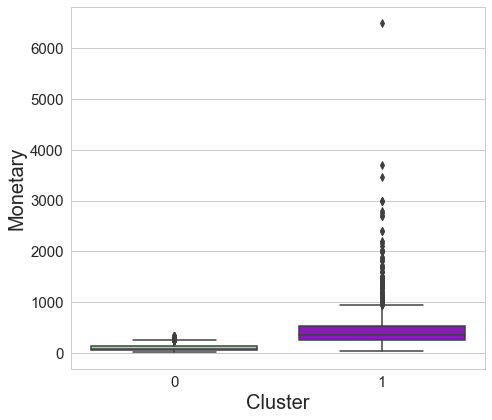

In [79]:
boxplot(X_DBSCAN, 'Monetary')

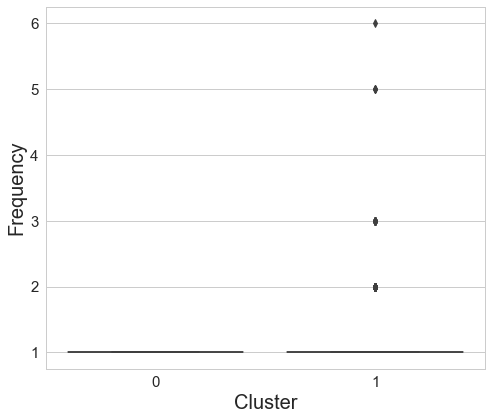

In [80]:
boxplot(X_DBSCAN, 'Frequency')

## 4- RFM Performing a Hierarchical clustering 

In [81]:
def plot_dendrogram(Z, names, figsize=(10,25)):
    '''Plot a dendrogram to illustrate hierarchical clustering'''

    plt.figure(figsize=figsize)
    plt.style.use('seaborn-whitegrid')

    plt.title('Hierarchical Clustering Dendrogram', size=25)
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )

### 4-1- Clustering

In [82]:
X_hierarchical = RFM_df.sample(frac=0.1) 
X_hierarchical_scale=preprocessor.fit_transform(X_hierarchical)
X_hierarchical_scale = pd.DataFrame(data=X_hierarchical_scale, columns=RFM_df.columns)

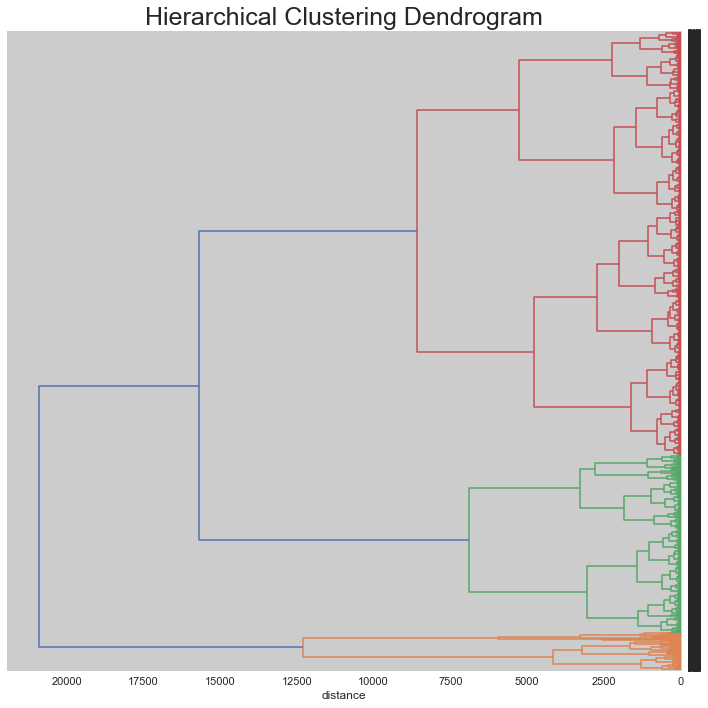

In [83]:
Z=linkage(X_hierarchical,'ward')
names=X_hierarchical.index
plot_dendrogram(Z, names, figsize=(10,10))

In [84]:
model= AgglomerativeClustering(affinity='euclidean', linkage='ward', compute_full_tree=True)

In [85]:
model.set_params(n_clusters=3)
clusters=model.fit_predict(X_hierarchical_scale)
np.bincount(clusters)

array([5191,  268, 3688], dtype=int64)

In [86]:
X_hierarchical['cluster']=clusters
X_hierarchical

,Frequency,Monetary,Recency,cluster
54479,1,124.00,536,2
63502,1,146.00,308,2
55547,1,139.90,175,0
3369,1,82.90,282,2
10970,1,229.99,463,2
...,...,...,...,...
49823,1,72.00,152,0
15383,1,260.70,114,0
355,1,110.32,43,0
80814,1,139.90,305,2


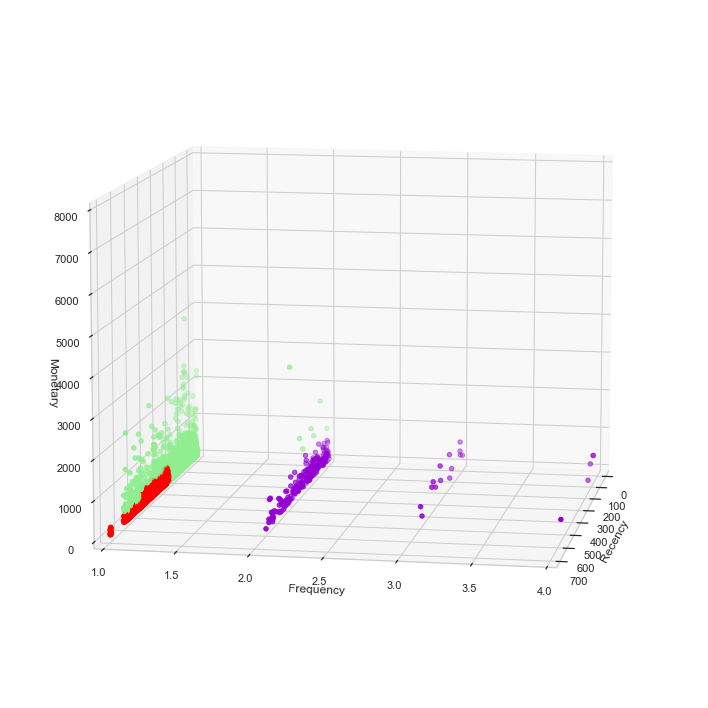

In [87]:
plot_3D_clusters(X_hierarchical, 'cluster')

### 4-2- Clusters analyzing

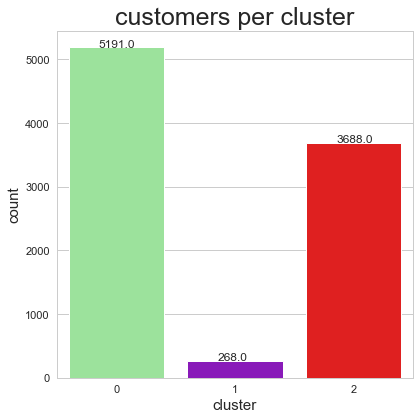

In [88]:
X_hierarchical_scale['cluster']=clusters
customers_per_cluster(X_hierarchical_scale)

In [89]:
X_hierarchical['cluster']=clusters
X_hierarchical.groupby('cluster').mean()

,Frequency,Monetary,Recency
cluster,,,
0,1.001348,167.168871,140.039877
1,2.100746,239.664030,219.313433
2,1.000000,100.372443,379.523048


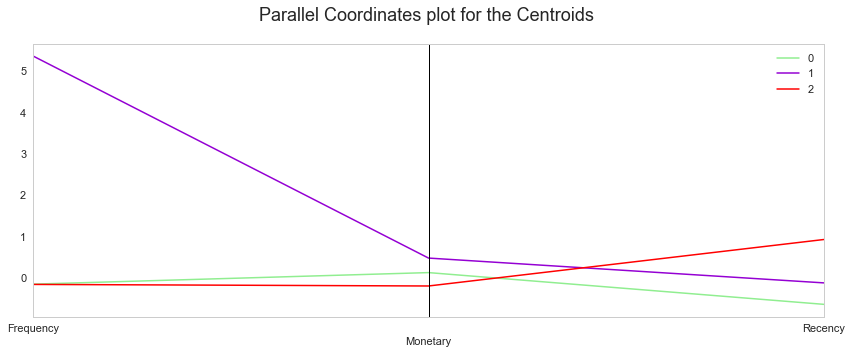

In [90]:
centroids = X_hierarchical_scale.groupby('cluster').mean()
centroids = centroids.reset_index()
centroids
display_parallel_coordinates_centroids(centroids, 3)

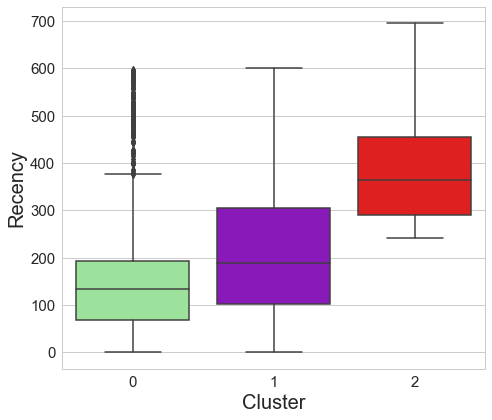

In [91]:
boxplot(X_hierarchical, 'Recency')

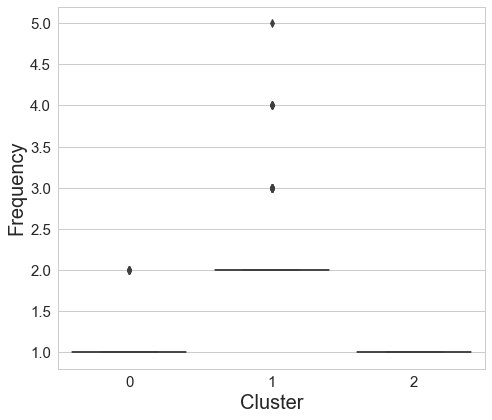

In [92]:
boxplot(X_hierarchical, 'Frequency')

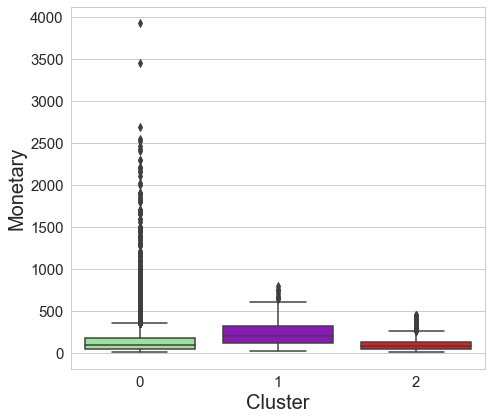

In [93]:
boxplot(X_hierarchical, 'Monetary')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


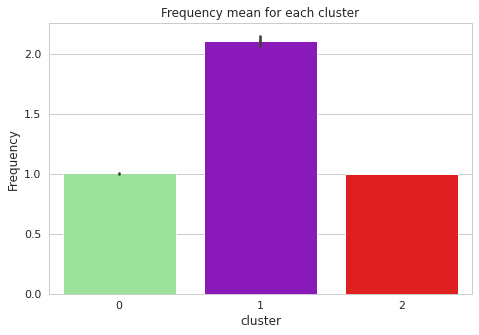

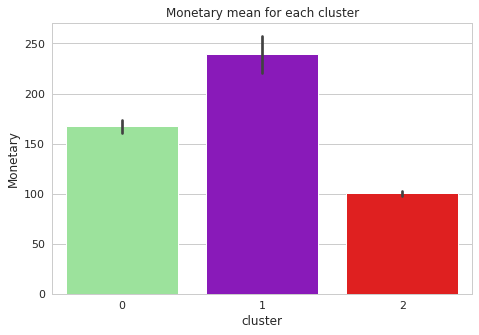

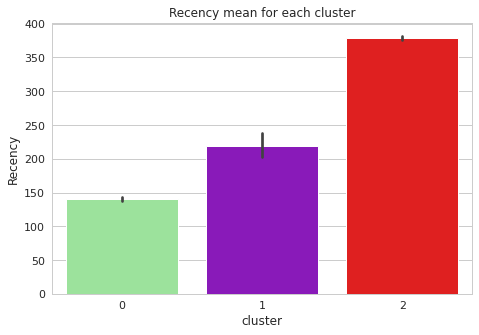

ValueError: Could not interpret input 'R_score'

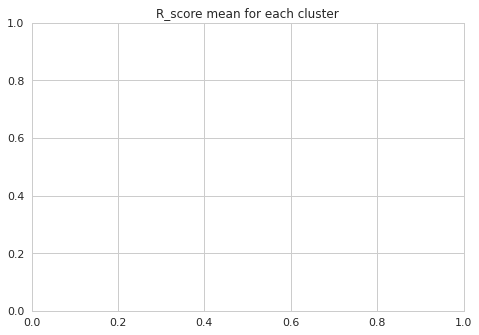

In [102]:
for column in RFM_df.columns:
    plt.figure(figsize=(7,5))
    titre = str(column) + ' mean for each cluster' 
    plt.title(titre)
    sns.barplot(x = 'cluster',
                y = column,
                data = X_hierarchical, 
                palette=palette)
    plt.show()
   

# V- RFM Scoring classification

In [95]:
RFM_df['R_score'] = pd.qcut(RFM_df['Recency'], 3, labels=[1, 2, 3]).astype(str)
RFM_df['M_score'] = pd.qcut(RFM_df['Monetary'], 3, labels=[1, 2, 3]).astype(str)
RFM_df['F_score'] = RFM_df['Frequency'].apply(lambda x: '1' if x==1 else '2')

RFM_df['RFM_score'] = RFM_df['R_score'] + RFM_df['F_score'] + RFM_df['M_score']
RFM_df

,Frequency,Monetary,Recency,R_score,M_score,F_score,RFM_score
0,1,129.90,111,1,3,1,113
1,1,18.90,114,1,1,1,111
2,1,69.00,537,3,2,1,312
3,1,25.99,321,3,1,1,311
4,1,180.00,288,2,3,1,213
...,...,...,...,...,...,...,...
91468,1,1570.00,447,3,3,1,313
91469,1,64.89,262,2,2,1,212
91470,1,89.90,568,3,2,1,312
91471,1,115.00,119,1,2,1,112


- 1-CORE - '123' - most recent, frequent, revenue generating - core customers that should be considered as most valuable clients
- 2-GONE - '311', '312', '313' - gone, one-timers - those clients are probably gone;
- 3-ROOKIE - '111', '112', '113' - just have joined - new clients that have joined recently
- 4-WHALES - '323', '213', '223 - most revenue generating - whales that generate revenue
- 5-LOYAL - '221', '222', '321', '322' - loyal users
- 6-REGULAR - '121', '122', '211', '212', - average users - just regular customers that don't stand out

In [96]:
def segment(x):
    if x == '123':
        return 'Core'
    elif x in ['311', '312', '313']:
        return 'Gone'
    elif x in ['111', '112', '113']:
        return 'Rookies'
    elif x in ['323', '213', '223']:
        return 'Whales'
    elif x in ['221', '222', '321', '322']:
        return 'Loyal'
    else:
        return 'Regular'

In [97]:
RFM_df['segments'] = RFM_df['RFM_score'].apply(segment)
RFM_df['segments'].value_counts(normalize=True)*100

Rookies    32.372394
Gone       32.326479
Regular    22.215299
Whales     11.726958
Core        0.755414
Loyal       0.603457
Name: segments, dtype: float64

In [98]:
segmentwise = RFM_df.groupby('segments').agg(RecencyMean = ('Recency', 'mean'),
                                          FrequencyMean = ('Frequency', 'mean'),
                                          MonetaryMean = ('Monetary', 'mean'),
                                          GroupSize = ('Recency', 'size'))
segmentwise = segmentwise.reset_index()
segmentwise

,segments,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
0,Core,74.257598,2.193922,359.846657,691
1,Gone,417.613358,1.000000,140.264463,29570
2,Loyal,317.989130,2.050725,84.786467,552
3,Regular,217.474189,1.015550,61.252309,20321
4,Rookies,74.928475,1.000000,140.520981,29612
5,Whales,227.226252,1.119884,287.575717,10727


Text(0.5, 1.0, 'order per customer')

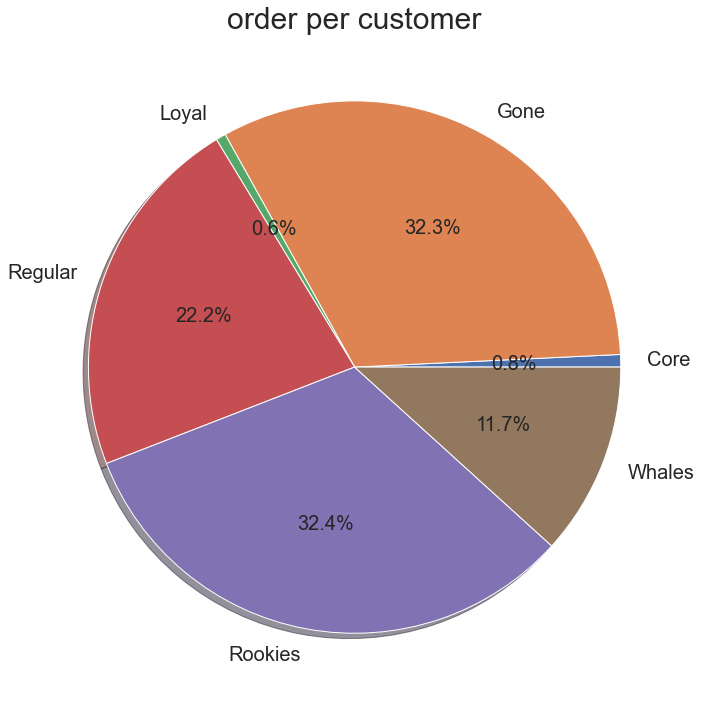

In [99]:
fig,ax = plt.subplots (figsize = (10,10))
ax.pie(segmentwise["GroupSize"], labels = segmentwise["segments"].unique() ,
       autopct ='%1.1f%%' , shadow=True , textprops={'fontsize': 20})  
plt.title ("order per customer" , size= 30)

Text(0.5, 1.0, 'Customer segmentation')

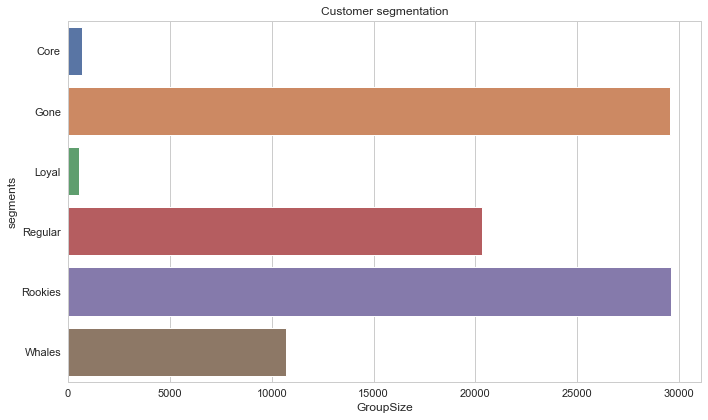

In [100]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.barplot(data=segmentwise, x='GroupSize', y='segments', orient='h')
plt.title('Customer segmentation')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


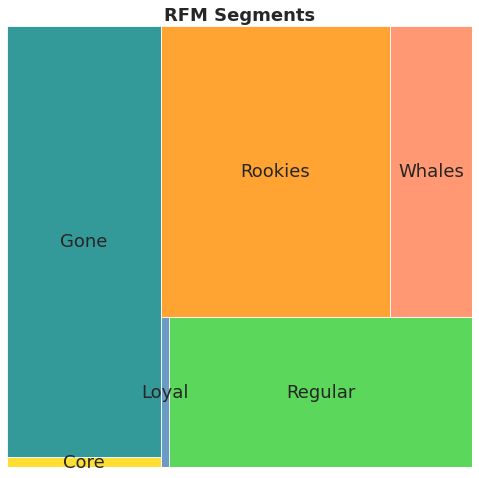

In [101]:
import squarify
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(7, 7)
squarify.plot(sizes = segmentwise['GroupSize'], 
              label = segmentwise['segments'],
              color = ['gold', 'teal', 'steelblue', 'limegreen', 'darkorange', 'coral'],
              alpha = 0.8)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()